## UFRJ | Cálculo Numérico | 2021.2

### Tarefa 7 | Biblioteca de CN

#### Grupo: Francisco Oliveira (119150156), Gabriele Jandres (119159948)  e Victor Cardoso (119157174)

#### Discussões com: Carlos Bravo, Markson Arguello, Gabrielly Andrade

In [8]:
using LinearAlgebra
using Polynomials: Polynomial
using QuadGK
using Plots
using Calculus

### 1. Funções auxiliares

_________________________________________________________________________________________________________________________________________________________________________________________

_________________________________________________________________________________________________________________________________________________________________________________________

In [2]:
# Função auxiliar para a função do método da bisseção. Verifica se a função tem sinais opostos nos extremos do intervalo dado
# -- Parâmetros --
# a: ponto inicial do intervalo
# b: ponto final do intervalo

function tem_sinais_opostos(f, a, b) #função recebe f(a) e f(b) não nulos
    return f(a) * f(b) < 0
end

tem_sinais_opostos (generic function with 1 method)

In [3]:
# Função auxiliar para a função do método da bisseção. Verifica se a é uma raiz da função f
# -- Parâmetros --
# a: valor arbitrário

function eh_raiz(f, a)
    return f(a) == 0
end

eh_raiz (generic function with 1 method)

In [4]:
# Função auxiliar para a função do método da bisseção. Faz a média entre x e y
# -- Parâmetros --
# x e y: valores arbitrários

function media(x, y)
    return (x + y) / 2
end

media (generic function with 1 method)

In [5]:
# Função para conferir a matriz encontrada como solução de sistemas lineares

# -- Parâmetros --
# A: matriz original
# b: matriz coluna de resultados
# x: resultado do sistema que encontramos

# -- Retorno --
# Imprime uma mensagem indicando se a matriz calculada está correta ou não

function confere_matriz(A, b, x) 
    n, = size(x) # dimensão da matriz x
    
    x_check = A \ b # resolvemos o sistema com o Julia para conferir nossos resultados
    
    erro = 0.00001 # definimos um erro máximo 
    
    println("Matriz encontrada")
    
    for i = 1:n 
        println(x[i, 1]) # exibimos os valores de cada posição
        
        if x[i, 1] - x_check[i, 1] > erro
            print("O valor da posição ", i, ", está incorreto")
        end
        
    end
        
    print("O resultado do sistema está correto!")
end

confere_matriz (generic function with 1 method)

In [6]:
# Função auxiliar para construir a matriz de Vandermonde

# -- Parâmetros --
# x: conjunto dos pontos do eixo x
# grau: grau que desejamos para ser uma das dimensões da matriz

function vandermonde(x, grau)
    n, = size(x) # quantidade de pontos
    V = zeros(n, grau + 1) # criamos uma matriz n X (grau + 1)
    
    # preenchemos a matriz criada
    for i = 1:n
        for j = 1:(grau + 1)
            V[i, j] = x[i] ^ (j - 1)
        end
    end
    
    return V
end

vandermonde (generic function with 1 method)

In [7]:
# Função para criar uma matriz quadrada n x n no modelo usado no método das diferenças finitas

# -- Parâmetros --
# n: dimensão da matriz quadrada
# c_1: coeficiente de y'
# c_2: coeficiente de y
# h: tamanho do intervalo

# -- Retorno --
# A: a matriz criada

function criacao_da_matriz(n, c_1, c_2, h)
    A = zeros(n, n) # matriz de coeficientes
    k = 0 # índice
    
    # Manual nos extremos   
    A[1, 1] = 2 * h^2 * c_2(k) - 2
    A[1, 2] = 1 + h/2 * c_1(k)
    A[n, n - 1] = 1 - h/2 * c_1(k)
    A[n, n] = 2 * h^2 * c_2(k) - 2
    
    # Tridiagonal
    for i = 2:(n)
        k += h
        ai = 1 - h/2 * c_1(k)
        bi = 2 * h^2 * c_2(k) - 2
        ci = 1 + h/2 * c_1(k)

        if (i != 1)
            A[i, i - 1] = ai
        end
        
        A[i, i] = bi
        
        if (i != n)
            A[i, i + 1] = ci
        end
    end
    
    return A
end

criacao_da_matriz (generic function with 1 method)

_________________________________________________________________________________________________________________________________________________________________________________________

### 2. Achar um valor aproximado de uma função com informações de derivadas (Taylor)

_________________________________________________________________________________________________________________________________________________________________________________________

#### Função

In [9]:
# Função para calcular o valor de um x em uma função aproximada usando Taylor (derivadas em torno do ponto)

# -- Parâmetros --
# x: ponto onde desejamos calcular
# a: valor de um ponto próximo
# funcoes: lista com a função original e suas derivadas
# M: maior valor da derivada no intervalo

# -- Retorno --
# y: valor de y calculado
# E: erro máximo

function taylor(x, a, funcoes, M)
    y = 0 # resultado
    E = M * (x - a)^2 / 2 # erro
    
    for i = 1:length(funcoes)
        y += ((funcoes[i](a)) * ((x - a)^(i - 1))) / factorial(i - 1) # polinômio de Taylor
    end
    
    return y, E
end

taylor (generic function with 1 method)

##### Exemplos de uso

In [10]:
# -- Exemplo 1 --

seno = Array{Function}(undef, 5)
seno[1] = x -> sin(x)
seno[2] = x -> cos(x)
seno[3] = x -> -sin(x)
seno[4] = x -> -cos(x)
seno[5] = x -> sin(x)
x = 2
a = π/2
M = 1

y, E = taylor(x, a, seno, M)

println("A aproximação calculada eh: ", y, " com erro ", E)

# -- Checagem de resultados --

abs(y - sin(x)) <= E ? println("A aproximação de sen(", x, ") calculada está correta") : println("A aproximação de sen(", x, ") calculada está incorreta")

A aproximação calculada eh: 0.9093060808879897 com erro 0.09210789654637662
A aproximação de sen(2) calculada está correta


In [11]:
# -- Exemplo 2 --

e = Array{Function}(undef, 7)
e[1] = x -> MathConstants.e^x
e[2] = x -> MathConstants.e^x
e[3] = x -> MathConstants.e^x
e[4] = x -> MathConstants.e^x
e[5] = x -> MathConstants.e^x
e[6] = x -> MathConstants.e^x
e[7] = x -> MathConstants.e^x
x = 0.5
a = 1
M = MathConstants.e^0.7

y, E = taylor(x, a, e, M)

println("A aproximação calculada eh: ", y, " com erro ", E)

# -- Checagem de resultados --

abs(y - MathConstants.e^0.5) <= E ? println("A aproximação de e^", x, " calculada está correta") : println("A aproximação de e^", x, " calculada está incorreta")

A aproximação calculada eh: 1.6487252348871932 com erro 0.2517190884338096
A aproximação de e^0.5 calculada está correta


In [12]:
# -- Exemplo 3 --

cosseno = Array{Function}(undef, 9)
cosseno[1] = x -> cos(x)
cosseno[2] = x -> -sin(x)
cosseno[3] = x -> -cos(x)
cosseno[4] = x -> sin(x)
cosseno[5] = x -> cos(x)
cosseno[6] = x -> -sin(x)
cosseno[7] = x -> -cos(x)
cosseno[8] = x -> sin(x)
cosseno[9] = x -> cos(x)
x = 2
a = π
M = 1

y, E = taylor(x, a, cosseno, M)

println("A aproximação calculada eh: ", y, " com erro ", E)

# -- Checagem de resultados --

abs(y - cos(x)) <= E ? println("A aproximação de cos(", x, ") calculada está correta") : println("A aproximação de cos(", x, ") calculada está incorreta")

A aproximação calculada eh: -0.41614786236527607 com erro 0.6516168933650927
A aproximação de cos(2) calculada está correta


_________________________________________________________________________________________________________________________________________________________________________________________

### 3. Encontrar raiz aproximadamente (Resolver equações não-lineares)

_________________________________________________________________________________________________________________________________________________________________________________________

#### Método da Bisseção

##### Para rodar essa função, as seguintes funções devem ter sido executadas:
1. "eh_raiz"
2. "tem_sinais_opostos"
3. "media"

In [13]:
# Função com o método da bisseção para calcular aproximações

# -- Parâmetros --
# f: função a ser aproximada
# a: ponto inicial do intervalo
# b: ponto final do intervalo
# tamanho_final_do_intervalo: tamanho final do intervalo 

# -- Retorno --
# x: x tal que f(x) = 0

function bissecao(f, a, b, tamanho_final_do_intervalo)     
    if eh_raiz(f, a) # se a for raiz da função então a eh uma aproximação
        return a
    end
    if eh_raiz(f, b) # se b for raiz da função então a eh uma aproximação
        return b
    end
    if !(tem_sinais_opostos(f, a, b)) # a e b precisam ter sinais opostos por causa do TVI
        return "Não tem sinais opostos"
    end
    
    iteracoes = floor(log2((b - a) / tamanho_final_do_intervalo)) + 1
    
    for i = 1:iteracoes
        m = media(a, b)
        
        if eh_raiz(f, m)
            return m
        end
        
        if tem_sinais_opostos(f, a, m) # se a e m tiverem sinais opostos, m será o novo final do intervalo
            b = m
        else
            a = m # se b e m tiverem sinais opostos, m será o novo início do intervalo
        end
    end
    
    x = media(a, b)
    return x
end

bissecao (generic function with 1 method)

##### Exemplos de uso

In [14]:
# -- Exemplo 1 --

f(x) = x^3 - 43
a = 2
b = 4
erro = 1e-8 
tamanho = 2 * erro # tamanho final do intervalo é 2 vezes o erro, porque dessa forma o erro máximo será o que desejarmos

r = bissecao(f, a, b, tamanho)

println("Raiz calculada: ", r)

abs(r - cbrt(43)) < erro ? println("Obtemos a raiz com erro máximo desejado de ", erro) : println("Não obtemos a raiz com o erro que desejávamos")

Raiz calculada: 3.5033980533480644
Obtemos a raiz com erro máximo desejado de 1.0e-8


In [15]:
# -- Exemplo 2 --

f(x) = x^2 - 10
a = 3
b = 4
erro = 1e-10 
tamanho = 2 * erro # tamanho final do intervalo é 2 vezes o erro, porque dessa forma o erro máximo será o que desejarmos

r = bissecao(f, a, b, tamanho)

println("Raiz calculada: ", r)

abs(r - sqrt(10)) < erro ? println("Obtemos a raiz com erro máximo desejado de ", erro) : println("Não obtemos a raiz com o erro que desejávamos")

Raiz calculada: 3.162277660157997
Obtemos a raiz com erro máximo desejado de 1.0e-10


In [16]:
# -- Exemplo 3 --

f(x) = x^3 - 130
a = 5
b = 6
erro = 1e-6
tamanho = 2 * erro # tamanho final do intervalo é 2 vezes o erro, porque dessa forma o erro máximo será o que desejarmos

r = bissecao(f, a, b, tamanho)

println("Raiz calculada: ", r)

abs(r - cbrt(130)) < erro ? println("Obtemos a raiz com erro máximo desejado de ", erro) : println("Não obtemos a raiz com o erro que desejávamos")

Raiz calculada: 5.065796852111816
Obtemos a raiz com erro máximo desejado de 1.0e-6


#### Método de Newton

In [17]:
# Função iterativa com o método de Newton para calcular aproximações de funções

# -- Parâmetros --
# iteracoes: o numero de iterações que o usuário deseja para aumentar a precisão
# chute: o chute inicial necessário para o método
# funcao: a função obtida com a manipulação da equação original
# derivada: a derivada da função anterior

# -- Retorno --
# chute: número tal que f(chute) = 0

function newton(iteracoes, chute, funcao, derivada) 
    for i=1:iteracoes
        chute = chute - (funcao(chute) / derivada(chute)) # atualiza o chute utilizando a formula do metodo de newton
    end
    return chute
end

newton (generic function with 1 method)

##### Exemplos de uso

In [18]:
# -- Exemplo 1 --

f(x) = x^3 - 43
df(x) = 3x^2
chute = 4

newton(2, chute, f, df)

3.504373140453473

In [19]:
# -- Exemplo 2 --

f(x) = x^2 - 10
df(x) = 2x
chute = 3

newton(3, chute, f, df)

3.1622776601698424

In [20]:
# -- Exemplo 3 --

f(x) = x^3 - 130
df(x) = 3x^2
chute = 5

newton(4, chute, f, df)

5.065797019100886

#### Método da bisseção e newton conjugados

##### Para rodar essa função, as seguintes funções devem ter sido executadas:
1. "eh_raiz"
2. "tem_sinais_opostos"
3. "bissecao"
4. "newton"

In [21]:
# Função misturando o método da bisseção e newton para encontrar uma raiz de um polinômio de grau 5

# -- Parâmetros --
# f: função polinomial que queremos descobrir a raiz
# df: derivada da função anterior
# a: ponto inicial do intervalo
# b: ponto final do intervalo
# tam: tamanho final do intervalo para o método da bisseção
# iteracoes: número de iterações para o método de newton

# -- Retorno --
# x: número tal que f(x) = 0

function bissecao_newton(f, df, a, b, tam, iteracoes) 
    
    if eh_raiz(f, a) # se a for raiz da função então a eh uma aproximação
        return a
    end
    if eh_raiz(f, b) # se b for raiz da função então a eh uma aproximação
        return b
    end
    if !(tem_sinais_opostos(f, a, b)) # a e b precisam ter sinais opostos por causa do TVI
        return "Não tem sinais opostos"
    end
    
    # reduzindo o intervalo para 10^⁻2, conseguimos nosso chute inicial usando o método da bisseção
    chute_inicial = bissecao(f, a, b, tam)
    
    # utilizando nosso chute inicial vamos agora usar o método de newton
    x = newton(iteracoes, chute_inicial, f, df)
    
    return x
end

bissecao_newton (generic function with 1 method)

##### Exemplos de uso

In [22]:
# -- Exemplo 1 --

f(x) = x^3 - 43
df(x) = 3x^2
a = 2
b = 4
tam = 1e-2
iteracoes_newton = 2

bissecao_newton(f, df, a, b, tam, iteracoes_newton)

3.5033980603867256

In [23]:
# -- Exemplo 2 --

f(x) = x^2 - 10
df(x) = 2x
a = 3
b = 4
tam = 1e-4
iteracoes_newton = 4

bissecao_newton(f, df, a, b, tam, iteracoes_newton)

3.1622776601683795

In [24]:
# -- Exemplo 3 --

f(x) = x^3 - 130
df(x) = 3x^2
a = 5
b = 6
tam = 1e-6
iteracoes_newton = 6

bissecao_newton(f, df, a, b, tam, iteracoes_newton)

5.065797019100886

_________________________________________________________________________________________________________________________________________________________________________________________

### 4. Interpolação Polinomial

_________________________________________________________________________________________________________________________________________________________________________________________

#### a. Função com Vandermonde

In [25]:
# Função auxiliar para construir a matriz de Vandermonde sem considerar um grau máximo

# -- Parâmetros --
# x: conjunto dos pontos do eixo x

# -- Retorno --
# V: a matriz criada

function vandermonde(x)
    n, = size(x) # quantidade de pontos
    V = zeros(n, n) # criamos uma matriz n X (n + 1)
    
    # preenchemos a matriz criada
    for i = 1:n
        for j = 1:(n)
            V[i, j] = x[i] ^ (j - 1)
        end
    end
    
    return V
end

vandermonde (generic function with 2 methods)

##### Para rodar essa função, as seguintes funções devem ter sido executadas:
1. "vandermonde"
2. "minimos_quadrados" (problema 10)

In [27]:
# Função para gerar os coeficientes do polinômio interpolador de uma função

# -- Parâmetros --
# x: conjunto de valores de x (valores de x dos pontos)
# y: conjunto de valores de y (valores de y dos pontos)

# -- Retorno --
# f: o polinômio interpolador com grau no máximo n

function interpolacao(x, y)
    V = vandermonde(x) # construímos a matriz de Vandermonde
    c = minimos_quadrados(V, y) # resolve o sistema linear Vc = y
    f = Polynomial(c) # cria um polinômio com os coeficientes descobertos
    
    return f
end

interpolacao (generic function with 1 method)

##### Exemplos de uso

In [35]:
# -- Exemplo 1 --

x = [-1.2, 0.3, 1.1]
y = [-5.76, -5.61, -3.69]

p = interpolacao(x, y)

println("A função polinomial encontrada foi: ", p)

A função polinomial encontrada foi: -6.0 + 1.0*x + 1.0*x^2


In [36]:
# -- Exemplo 2 --

x = [1, 2, 3, 4, 5]
y = [2, 7, 10, 14, 20]

p = interpolacao(x, y)

println("A função polinomial encontrada foi: ", p)

A função polinomial encontrada foi: -10.0 + 17.6667*x - 6.91667*x^2 + 1.33333*x^3 - 0.0833333*x^4


In [37]:
# -- Exemplo 3 --

x = [3, 7, 23, 45, 52, 62, 69]
y = [123, 323, 182, 231, 3243, 12323, 19029]

p = interpolacao(x, y)

println("A função polinomial encontrada foi: ", p)

A função polinomial encontrada foi: -369.756 + 244.74*x - 32.6172*x^2 + 2.13524*x^3 - 0.0719747*x^4 + 0.00112962*x^5 - 6.29122e-6*x^6


#### b. Função com Polinômio de Lagrange

In [38]:
# Função para criar o polinômio interpolador de Lagrange correspondente aos pontos dados. Utiliza a fórmula vista em aula do polinômio interpolador

# -- Parâmetros --
# X: conjunto dos pontos do eixo x
# Y: conjunto dos pontos do eixo y

# -- Retorno --
# F: o polinômio interpolador de Lagrange

function lagrange(X, Y)
    n, = size(X) # quantidade de pontos
    
    F(x) = sum([
                Y[j] * prod([x - X[i] for i = 1:n if i != j]) / # produtorio do numerador
                prod([X[j] - X[i] for i = 1:n if i != j ]) for j = 1:n # produtorio do denominador
            ])
    
    return F
end

lagrange (generic function with 1 method)

##### Exemplos de uso

In [39]:
# -- Exemplo 1 --

x = [0, 1, 2, 5]
y = [2, 3, 12, 147]

F = lagrange(x, y)

# -- Checagem de resultados --

n, = size(x)
correto = true

for i = 1:n
    abs(F(x[i]) - y[i]) < 0.001 ? continue : correto = false
end

correto ? println("O polinômio encontrado está correto") : println("O polinômio encontrado está incorreto")

O polinômio encontrado está correto


In [40]:
# -- Exemplo 2 --

x = [0, 2, 5, 7]
y = [23, 17, 23, 37] 

F = lagrange(x, y)

# -- Checagem de resultados --

n, = size(x)
correto = true

for i = 1:n
    abs(F(x[i]) - y[i]) < 0.001 ? continue : correto = false
end

correto ? println("O polinômio encontrado está correto") : println("O polinômio encontrado está incorreto")

O polinômio encontrado está correto


In [41]:
# -- Exemplo 3 --

x = [2, 4.4, 10, 21]
y = [0, 13, 5.2, 9]

F = lagrange(x, y)

# -- Checagem de resultados --

n, = size(x)
correto = true

for i = 1:n
    abs(F(x[i]) - y[i]) < 0.001 ? continue : correto = false
end

correto ? println("O polinômio encontrado está correto") : println("O polinômio encontrado está incorreto")

O polinômio encontrado está correto


_________________________________________________________________________________________________________________________________________________________________________________________

### 5. Regressão Polinomial (“Interpolação aproximada”)

_________________________________________________________________________________________________________________________________________________________________________________________

#### Função

In [43]:
# Função auxiliar para construir a matriz de Vandermonde

# -- Parâmetros --
# x: conjunto dos pontos do eixo x
# grau: grau que desejamos para ser uma das dimensões da matriz

function vandermonde(x, grau)
    n, = size(x) # quantidade de pontos
    V = zeros(n, grau + 1) # criamos uma matriz n X (grau + 1)
    
    # preenchemos a matriz criada
    for i = 1:n
        for j = 1:(grau + 1)
            V[i, j] = x[i] ^ (j - 1)
        end
    end
    
    return V
end

vandermonde (generic function with 2 methods)

##### Para rodar essa função, as seguintes funções devem ter sido executadas:
1. "vandermonde"
2. "minimos_quadrados"

In [44]:
# Função para calcular a regressão polinomial

# -- Parâmetros --
# x: conjunto dos pontos do eixo x
# y: conjunto dos pontos do eixo y
# k: o grau máximo desejado para o polinômio calculado

# -- Retorno --
# f: o polinômio interpolador com grau no máximo k

function regressao(x, y, k)
    V = vandermonde(x, k) # construímos a matriz de Vandermonde
    
    # "Polynomial" transformará o resultado da função de mínimos quadrados, que é uma lista de coeficientes, em um polinômio.
    f = Polynomial(minimos_quadrados(V, y))
    
    return f
end

regressao (generic function with 1 method)

##### Exemplos de uso

In [45]:
# -- Exemplo 1 --

x = [1, 3, 5]
y = [3, 5, 7]

z = regressao(x, y, 2)

println("A função polinomial encontrada foi: ", z)

A função polinomial encontrada foi: 2.0 + 1.0*x + 1.94289e-15*x^2


In [46]:
# -- Exemplo 2 --

x = [3.5, 2.1, 7.44213, 10.4, 8.5]
y = [290, 90, 123, 100, 88]

z = regressao(x, y, 4)

println("A função polinomial encontrada foi: ", z)

A função polinomial encontrada foi: -1003.66 + 846.614*x - 187.041*x^2 + 16.2078*x^3 - 0.487436*x^4


In [47]:
# -- Exemplo 3 --

x = [3.5, 2.1, -7.44213, 10.4, -8.5, 12.66]
y = [0.5, 90, -201, 100, 88, -22.99182]

z = regressao(x, y, 3)

println("A função polinomial encontrada foi: ", z)

A função polinomial encontrada foi: -109.308 + 45.4407*x + 2.84016*x^2 - 0.477009*x^3


_________________________________________________________________________________________________________________________________________________________________________________________

### 6. Regressão com coeficientes lineares (generalização do problema anterior)

_________________________________________________________________________________________________________________________________________________________________________________________

#### Função

In [48]:
# Função auxiliar para construir a matriz de Vandermonde

# -- Parâmetros --
# x: conjunto dos pontos do eixo x
# funcoes: conjunto de funcoes

function vandermonde_para_linear(x, funcoes)
    n, = size(x) # quantidade de pontos
    k, = size(funcoes)
    V = zeros(n, k) # criamos uma matriz n+1 X k
    
    # preenchemos a matriz criada
    for i = 1:n
        for j = 1:(k)
            V[i, j] = funcoes[j](x[i]) 
        end
    end
    
    return V
end

vandermonde_para_linear (generic function with 1 method)

##### Para rodar essa função, as seguintes funções devem ter sido executadas:
1. "vandermonde_para_linear"

In [49]:
# Função para calcular a regressão polinomial com coeficientes lineares. Constrói a matriz de Vandermonde e resolve o sistema usando mínimos quadrados.

# -- Parâmetros --
# x: conjunto dos pontos do eixo x
# y: conjunto dos pontos do eixo y
# f: conjunto de funções

# -- Retorno --
# c: lista de coeficientes tal que F(x) = c_1*f_1(x)+...+c_k*f_k(x)

function regressao_coeficientes_lineares(x, y, f)
    # Forma a matriz de vandermonde, aplicando uma função em cada coluna, tendo um x_n em cada linha.
    V = vandermonde_para_linear(x, f)
 
    #Realiza a operação de mínimos quadrados e retorna um array de coeficientes.
    c = minimos_quadrados(V, y)
    
    return c
end

regressao_coeficientes_lineares (generic function with 1 method)

##### Exemplos de uso

In [51]:
# -- Exemplo 1 --

x = [1.0, 3.0, 5]
y = [3, 5, 7.0]

f1(x) = 1
f2(x) = x
f3(x) = x^2
F = [f1,f2,f3]

z = regressao_coeficientes_lineares(x, y, F)

println("A lista de coeficientes encontrada foi: ", z)

# -- Checagem de resultados --

fun(x) = z[1] * f1(x) + z[2] * f2(x) + z[3] * f3(x)

n, = size(x)
correto = true
for i = 1:n
    abs(fun(x[i]) - y[i]) < 0.0001 ? continue : correto = false
end

correto ? println("Os coeficientes encontrados estão corretos") : println("Os coeficientes encontrados estão incorretos")

A lista de coeficientes encontrada foi: [2.000000000000033, 0.9999999999999812, 1.942890293094024e-15]
Os coeficientes encontrados estão corretos


In [53]:
# -- Exemplo 2 --

x = [-3, 2, 5, 7, 10]
y = [-12, 9.2, 7.05, 8, 15.75]

f1(x) = 1
f2(x) = x
f3(x) = x^2
f4(x) = x^3
f5(x) = x^4
F = [f1, f2, f3, f4, f5]

z = regressao_coeficientes_lineares(x, y, F)

println("A lista de coeficientes encontrada foi: ", z)

# -- Checagem de resultados --

fun(x) = z[1] * f1(x) + z[2] * f2(x) + z[3] * f3(x) + z[4] * f4(x) + z[5] * f5(x)

n, = size(x)
correto = true
for i = 1:n
    abs(fun(x[i]) - y[i]) < 0.0001 ? continue : correto = false
end

correto ? println("Os coeficientes encontrados estão corretos") : println("Os coeficientes encontrados estão incorretos")

A lista de coeficientes encontrada foi: [8.026923076919047, 2.1591987179505168, -1.0449711538458075, 0.13899358974343556, -0.004836538461527744]
Os coeficientes encontrados estão corretos


In [54]:
# -- Exemplo 3 --

x = [-20, -15, 0, 23, 33, 40, 80]
y = [-12, -2, 30, 50, 85.75, 132.2, 176]

f1(x) = 1
f2(x) = x
f3(x) = x^2
f4(x) = x^3
f5(x) = x^4
f6(x) = x^5
f7(x) = x^6

F = [f1, f2, f3, f4, f5, f6, f7]

z = regressao_coeficientes_lineares(x, y, F)

println("A lista de coeficientes encontrada foi: ", z)

# -- Checagem de resultados --

fun(x) = z[1] * f1(x) + z[2] * f2(x) + z[3] * f3(x) + z[4] * f4(x) + z[5] * f5(x) + z[6] * f6(x) + z[7] * f7(x)

n, = size(x)
correto = true
for i = 1:n
    abs(fun(x[i]) - y[i]) < 0.0001 ? continue : correto = false
end

correto ? println("Os coeficientes encontrados estão corretos") : println("Os coeficientes encontrados estão incorretos")

A lista de coeficientes encontrada foi: [29.999999990614015, 1.2854079880817153, -0.06764433646321777, 0.0007601279803708394, 8.447330753905575e-5, -1.0386762150860665e-6, 1.1601689596261309e-10]
Os coeficientes encontrados estão corretos


_________________________________________________________________________________________________________________________________________________________________________________________

### 7. Regressão com coeficientes não lineares

_________________________________________________________________________________________________________________________________________________________________________________________

##### Para rodar as funções abaixo, as seguintes funções devem ter sido executadas:
1. "minimos_quadrados"

#### Modelo exponencial

In [55]:
# Função para calcular a regressão com modelo exponencial com coeficientes não-lineares. Encontra os coeficientes a e b de f(x) = a * e^(bx), tais que f se aproxime
# nos pontos de x e y.

# -- Parâmetros --
# x: conjunto dos pontos do eixo x
# y: conjunto dos pontos do eixo y

# -- Retorno --
# c: coeficientes do mundo original

function regressao_exponencial(x, y)
    # -- Mundo original --
    # y = a * e^(bx)
    # ln(y) = ln(a * e^(bx))
    # ln(y) = ln(a) + bx

    # -- Mundo barra --
    # y' = a' + b'x'

    # -- Dicionário --
    # y' = ln(y)
    # a' = ln(a)
    # b' = b
    # x' = x
    
    n, = size(x)
    A = Matrix{Float64}(undef, n, 2)
    A[:, 1] = ones(n)
    A[:, 2] = x
    y = map(k -> log(k), y)

    a_barra, b_barra = minimos_quadrados(A, y)
    return exp(a_barra), b_barra
end

regressao_exponencial (generic function with 1 method)

##### Exemplos de uso

In [56]:
# -- Exemplo 1 --

x = [0, 90, 150]
y = [34, 30, 25]

a, b = regressao_exponencial(x, y)

println("Equação exponencial encontrada eh y = ", a, " * e^", b, "x")

Equação exponencial encontrada eh y = 34.53499200951645 * e^-0.001997856176482232x


In [57]:
# -- Exemplo 2 --

x = [2.5, 4.92, 11]
y = [46.45, 575.46, 320736.19]

a, b = regressao_exponencial(x, y)

println("Equação exponencial encontrada eh y = ", a, " * e^", b, "x")

Equação exponencial encontrada eh y = 3.4499988427337382 * e^1.039999930815882x


In [58]:
# -- Exemplo 3 --

x = [1.5, 2.2, 3.87]
y = [41.98, 170.23, 4803.80]

a, b = regressao_exponencial(x, y)

println("Equação exponencial encontrada eh y = ", a, " * e^", b, "x")

Equação exponencial encontrada eh y = 2.0900588856996545 * e^1.9999907010451357x


#### Modelo potencial

In [59]:
# Função para calcular a regressão com modelo potencial com coeficientes não-lineares. Encontra os coeficientes a e b de f(x) = a * x^b, tais que f se aproxime nos pontos 
# de x e y.

# -- Parâmetros --
# x: conjunto dos pontos do eixo x
# y: conjunto dos pontos do eixo y

# -- Retorno --
# c: coeficientes do mundo original

function regressao_potencial(x, y)
    # -- Mundo original --
    # y = a * x^b
    # ln(y) = ln(a * x^b)
    # ln(y) = ln(a) + ln(x^b)
    # ln(y) = ln(a) + b * ln(x)

    # -- Mundo barra --
    # y' = a' + b' * x'

    # -- Dicionário --
    # y' = ln(y)
    # a' = ln(a)
    # b' = b
    # x' = ln(x)
    
    n, = size(x)
    A = Matrix{Float64}(undef, n, 2)
    A[:, 1] = ones(n)
    A[:, 2] = map(k -> log(k), x)
    y = map(k -> log(k), y)

    a_barra, b_barra = minimos_quadrados(A, y)

    return exp(a_barra), b_barra
end

regressao_potencial (generic function with 1 method)

##### Exemplos de uso

In [60]:
# -- Exemplo 1 --

x = [1, 2, 3]
y = [30, 20, 10]

a, b = regressao_potencial(x, y)

println("Equação potencial encontrada eh y = ", a, " * x^", b)

Equação potencial encontrada eh y = 32.14956493347624 * x^-0.9553079170365222


In [61]:
# -- Exemplo 2 --

x = [1.45, 3.22, 9.3]
y = [3.89, 6.23, 7.1]

a, b = regressao_potencial(x, y)

println("Equação potencial encontrada eh y = ", a, " * x^", b)

Equação potencial encontrada eh y = 3.7526928375161623 * x^0.3130395102837435


In [62]:
# -- Exemplo 3 --

x = [22, 1.2, 7.3]
y = [89, 63, 4.1]

a, b = regressao_potencial(x, y)

println("Equação potencial encontrada eh y = ", a, " * x^", b)

Equação potencial encontrada eh y = 30.564009194070884 * x^-0.04119018284372813


#### Modelo geométrico

In [63]:
# Função para calcular a regressão com modelo geométrico com coeficientes não-lineares. Encontra os coeficientes a e b de f(x) = 1 / a + bx, tais que f se aproxime
# nos pontos de x e y.

# -- Parâmetros --
# x: conjunto dos pontos do eixo x
# y: conjunto dos pontos do eixo y

# -- Retorno --
# c: coeficientes do mundo original

function regressao_geometrica(x, y)
    # -- Mundo original --
    # y = 1 / a + bx
    # 1 / y = a + bx

    # -- Mundo barra --
    # y' = a' + b' * x'

    # -- Dicionário --
    # y' = 1 / y
    # a' = a
    # b' = b
    # x' = x
    
    n, = size(x)
    A = Matrix{Float64}(undef, n, 2)
    
    A[:, 1] = ones(n)
    A[:, 2] = x
    y = map(k -> 1/k, y)

    a_barra, b_barra = minimos_quadrados(A, y)

    return a_barra, b_barra
end

regressao_geometrica (generic function with 1 method)

##### Exemplos de uso

In [64]:
# -- Exemplo 1 --

x = [7, 25, 13]
y = [3, 2, 1]

a, b = regressao_geometrica(x, y)

println("Equação geometrica encontrada eh y = 1 / (", a, " + ", b,  "x)")

Equação geometrica encontrada eh y = 1 / (0.5813492063492061 + 0.001984126984126988x)


In [65]:
# -- Exemplo 2 --

x = [1.4, 2.2, 4.3]
y = [4.1, 3.13, 3.2]

a, b = regressao_geometrica(x, y)

println("Equação geometrica encontrada eh y = 1 / (", a, " + ", b,  "x)")

Equação geometrica encontrada eh y = 1 / (0.2440853088289629 + 0.018181687396060228x)


In [66]:
# -- Exemplo 3 --

x = [-22, 1.2, -5.3]
y = [-39, 43, -9.1]

a, b = regressao_geometrica(x, y)

println("Equação geometrica encontrada eh y = 1 / (", a, " + ", b,  "x)")

Equação geometrica encontrada eh y = 1 / (-0.03142288390766607 + 0.0006899107224003432x)


_________________________________________________________________________________________________________________________________________________________________________________________

### 8. Interpolação 2D (Lagrange 2D)

_________________________________________________________________________________________________________________________________________________________________________________________

#### Função

In [67]:
# Função para realizar a interpolação 2D dados pontos x e y e suas respectivas alturas z, utilizando o método de Lagrange 2D

# -- Parâmetros --
# x: conjunto dos pontos no eixo x
# y: conjunto dos pontos no eixo y
# z: conjunto dos pontos no eixo z (alturas z_00,z_01, z_10, z_11)

# -- Retorno --
# f: um polinômio de grau 2 de duas variáveis

function interpolacao_2d(xi, yi, zi)  
    # Utilizando a fórmula do polinômio interpolador de Lagrange, onde multiplicamos pelo polinômio que dá 1 no ponto e 0 nos demais para cada altura
    f(x, y) = (zi[1] * (xi[2] - x) * (yi[2] - y) + zi[2] * (xi[2] - x) * (y - yi[1]) + zi[3] * (x - xi[1]) * (yi[2] - y) + zi[4] * (x - xi[1]) * (y - yi[1])) / ((xi[2] - xi[1]) * (yi[2] - yi[1]))  
    
    a = f(0, 0) 
    b = f(1, 0) - a 
    c = f(0, 1) - a 
    d = f(1, 1) - a - b - c 
    
    return g(x, y) = a + b*x + c*y + d*x*y
end

interpolacao_2d (generic function with 1 method)

##### Exemplos de uso

In [69]:
# -- Exemplo 1 --

x = [1, 3]
y = [2, 4]
z = [800, 400, 600, 500]

g = interpolacao_2d(x, y, z)

a = g(0, 0) 
b = g(1, 0) - a
c = g(0, 1) - a 
d = g(1, 1) - a - b - c

println("O polinômio interpolador encontrado foi: ", a, " + (", b, "x", ") + (", c, "y", ") + (", d, "xy)")

O polinômio interpolador encontrado foi: 1450.0 + (-250.0x) + (-275.0y) + (75.0xy)


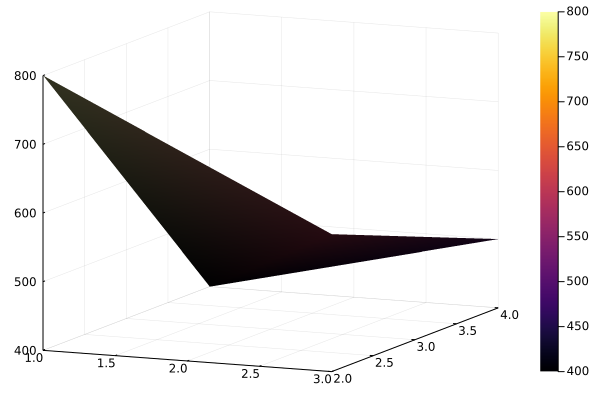

In [70]:
surface(x, y, g)

In [71]:
# -- Exemplo 2 --

x = [1, 3]
y = [2, 3]
z = [5231, 5229, 5623, 5623]

g = interpolacao_2d(x, y, z)

a = g(0, 0) 
b = g(1, 0) - a
c = g(0, 1) - a 
d = g(1, 1) - a - b - c

println("O polinômio interpolador encontrado foi: ", a, " + (", b, "x", ") + (", c, "y", ") + (", d, "xy)")

O polinômio interpolador encontrado foi: 5041.0 + (194.0x) + (-3.0y) + (1.0xy)


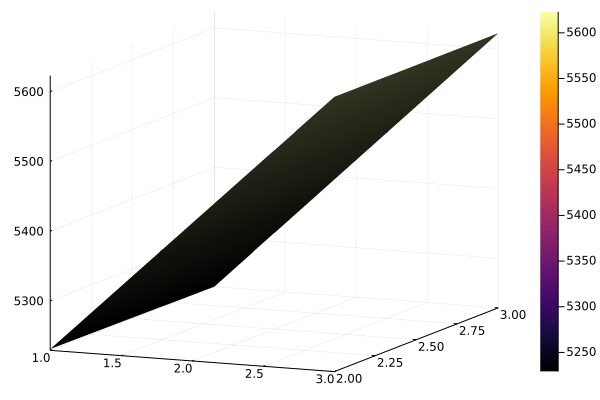

In [72]:
surface(x, y, g)

In [73]:
# -- Exemplo 3 --

x = [3, 5]
y = [2, 4]
z = [1260, 1726, 1656, 2522]

g = interpolacao_2d(x, y, z)

a = g(0, 0) 
b = g(1, 0) - a
c = g(0, 1) - a 
d = g(1, 1) - a - b - c

println("O polinômio interpolador encontrado foi: ", a, " + (", b, "x", ") + (", c, "y", ") + (", d, "xy)")

O polinômio interpolador encontrado foi: 800.0 + (-2.0x) + (-67.0y) + (100.0xy)


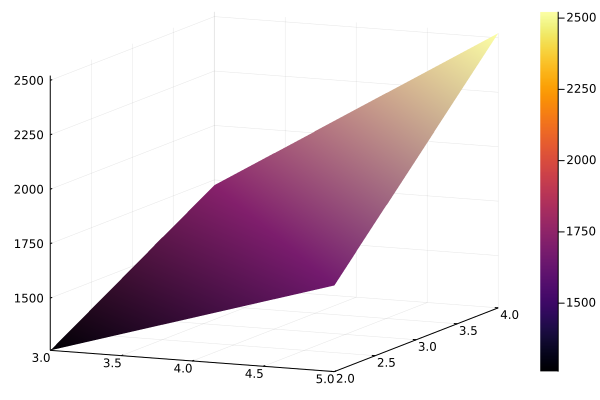

In [74]:
surface(x, y, g)

_________________________________________________________________________________________________________________________________________________________________________________________

### 9. Calcular a norma de um vetor v

_________________________________________________________________________________________________________________________________________________________________________________________

#### Função

In [75]:
# Função para calcular a norma de um vetor

# -- Parâmetros --
# v: um vetor n x 1

# -- Retorno --
# z: a norma do vetor

function calcula_norma(v)
    z = 0
    
    for i = 1:length(v)
        z += v[i]^2
    end
    
    z = sqrt(z)
    
    return z
end

calcula_norma (generic function with 1 method)

##### Exemplos de uso

In [76]:
# -- Exemplo 1 --

v = [3, 4]

z = calcula_norma(v)

println("Norma do vetor v eh: ", z)

# -- Checagem de resultados --

abs(norm(v) - z) < 0.0001 ? println("A norma encontrada está correta") : println("A norma encontrada está incorreta") 

Norma do vetor v eh: 5.0
A norma encontrada está correta


In [77]:
# -- Exemplo 2 --

v = Float64[-3, 2, 3, -5]

z = calcula_norma(v)

println("Norma do vetor v eh: ", z)

# -- Checagem de resultados --

abs(norm(v) - z) < 0.0001 ? println("A norma encontrada está correta") : println("A norma encontrada está incorreta") 

Norma do vetor v eh: 6.855654600401044
A norma encontrada está correta


In [78]:
# -- Exemplo 3 --

v = Float64[1.5, 5.7, 3.2, 5.6, 7.4]

z = calcula_norma(v)

println("Norma do vetor v eh: ", z)

# -- Checagem de resultados --

abs(norm(v) - z) < 0.0001 ? println("A norma encontrada está correta") : println("A norma encontrada está incorreta") 

Norma do vetor v eh: 11.449890829173876
A norma encontrada está correta


_________________________________________________________________________________________________________________________________________________________________________________________

### 10. Resolver um sistema linear denso aproximadamente

_________________________________________________________________________________________________________________________________________________________________________________________

#### Função

##### Para rodar essa função, as seguintes funções devem ter sido executadas:
1. "calcula_inversa"

In [79]:
# Função para resolver um sistema utilizando mínimos quadrados. Equivalente a A \ b

# -- Parâmetros --
# A: matriz densa n x n
# b: matriz coluna de resultados n x 1

# -- Retorno --
# x: x tal que Ax approx b

function minimos_quadrados(A, b)
    At = transpose(A)
    x = calcula_inversa((At * A)) * At * b # calculamos a inversa usando decomposição LU para poupar custos
    return x
end

minimos_quadrados (generic function with 1 method)

##### Exemplos de uso

In [80]:
# -- Exemplo 1 --

A = [1, 1, 1]

b = [4, 6, 11]

x = minimos_quadrados(A, b)

# -- Checagem de resultados --

confere_matriz(A, b, x)

Matriz encontrada
7.0
O resultado do sistema está correto!

In [81]:
# -- Exemplo 2 --

A = [
        2.0 1.0
        5.0 2.0
        1.0 2.0
    ]

b = [5.0, 3.0, 1.0]

x = minimos_quadrados(A, b)

# -- Checagem de resultados --

confere_matriz(A, b, x)

Matriz encontrada
0.7027027027027026
0.3513513513513514
O resultado do sistema está correto!

In [82]:
# -- Exemplo 3 --

A = [2, 3, 3.6]

b = [9, 13.5, 16.2]

x = minimos_quadrados(A, b)

# -- Checagem de resultados --

confere_matriz(A, b, x)

Matriz encontrada
4.499999999999999
O resultado do sistema está correto!

_________________________________________________________________________________________________________________________________________________________________________________________

### 11. Resolver exatamente uma sistema linear denso

_________________________________________________________________________________________________________________________________________________________________________________________

#### Função

##### Para rodar essa função, as seguintes funções devem ter sido executadas:
1. "decomposicao_lu"
2. "resolve_triangular_inferior"
3. "resolve_triangular_superior"

In [83]:
# Função para resolver um sistema denso

# -- Parâmetros --
# A: matriz densa n x n
# b: matriz coluna de resultados

# -- Retorno --
# x: x tal que Ax = b

function resolve_sistema_denso(A, b)
    L, U = decomposicao_lu(A) # decompomos a matriz A na multiplicação de duas triangulares (uma inferior e outra superior)
    y = resolve_triangular_inferior(L, b) # resolvemos o sistema triangular inferior
    x = resolve_triangular_superior(U, y) # resolvemos o sistema triangular superior
    return x
end

resolve_sistema_denso (generic function with 1 method)

#### Exemplos de uso


In [84]:
# -- Exemplo 1 --

# matriz com os coeficientes
A = Float64[
    1 1 1
    1 2 2
    2 1 3
]

# matriz coluna de resultados das equações
b = Float64[
    6 
    9
    11
]

x = resolve_sistema_denso(A, b)

# -- Checagem de resultados --

confere_matriz(A, b, x)

Matriz encontrada
3.0
2.0
1.0
O resultado do sistema está correto!

In [85]:
# -- Exemplo 2 --

# matriz com os coeficientes
A = [
         1 0 0 0 0 0 0 0
         0 1 0 0 0 0 0 0
         0 0 1 0 0 0 0 0
         -1 0 0 1 0 0 0 0
         0 0 -1 0 1 0 0 0
         0 -1 0 -1 0 1 0 0
         0 0 0 0 -1 0 1 0
         0 0 0 0 0 -1 -1 1
]

# matriz coluna de resultados das equações
b = [
        7000
        3500
        9000
        30000
        3000
        0
        3000
        500
]

x = resolve_sistema_denso(A, b)

# -- Checagem de resultados --

confere_matriz(A, b, x)

Matriz encontrada
7000.0
3500.0
9000.0
37000.0
12000.0
40500.0
15000.0
56000.0
O resultado do sistema está correto!

In [86]:
# -- Exemplo 3 --

# matriz com os coeficientes
A = [
    1 -1/4 -1/4 0
    -1/4 1 0 -1/4
    -1/4 0 1 -1/4
    0 -1/4 -1/4 1
]

# matriz coluna de resultados das equações
b = [
    20/4
    50/4
    15/4
    45/4
]

x = resolve_sistema_denso(A, b)

# -- Checagem de resultados --

confere_matriz(A, b, x)

Matriz encontrada
13.125
20.625
11.875
19.375
O resultado do sistema está correto!

_________________________________________________________________________________________________________________________________________________________________________________________

### 12. Resolver um sistema triangular superior

_________________________________________________________________________________________________________________________________________________________________________________________

#### Função

In [33]:
# Função para resolver um sistema triangular superior n x n por susbtituição reversa

# -- Parâmetros --
# U: matriz triangular onde os elementos da diagonal são diferentes de zero
# b: matriz coluna de resultados

# -- Retorno --
# x: x tal que Ux = b

function resolve_triangular_superior(U, b)   
    n = length(U)
    if length(U) !== 1
        n, = size(U) # dimensão da matriz U
    end
    x = zeros(n, 1) # criamos uma matriz coluna n x 1
    
    # resolução do sistema por substituição reversa
    for i = reverse(1:n)
        x[i] = b[i]
        for j = reverse(i + 1:n)
            x[i] -= U[i, j] * x[j]
        end
        x[i] /= U[i, i]
    end
    
    return x 
end

resolve_triangular_superior (generic function with 1 method)

#### Exemplos de uso


In [87]:
# -- Exemplo 1 --

A = [1 2 3; 0 4 5; 0 0 6]
b = [7; 8; 9]

x = resolve_triangular_superior(A, b)

# -- Checagem de resultados --

confere_matriz(A, b, x)

Matriz encontrada
2.25
0.125
1.5
O resultado do sistema está correto!

In [88]:
# -- Exemplo 2 --

A = [13 -21 35 67; 0 46 -75 98; 0 0 68 90; 0 0 0 45]
b = [76; -18; -19; 67]

x = resolve_triangular_superior(A, b)

# -- Checagem de resultados --

confere_matriz(A, b, x)

Matriz encontrada
-7.4517372723894475
-7.231763285024155
-2.25
1.488888888888889
O resultado do sistema está correto!

In [89]:
# -- Exemplo 3 --

A = [47 86 69 -43; 0 4 -5 2.4; 0 0 7.8 -9; 0 0 0 4.5]
b = [7.6; -1; -9; 7]

x = resolve_triangular_superior(A, b)

# -- Checagem de resultados --

confere_matriz(A, b, x)

Matriz encontrada
1.3428623386070193
-0.382051282051282
0.6410256410256411
1.5555555555555556
O resultado do sistema está correto!

_________________________________________________________________________________________________________________________________________________________________________________________

### 13. Resolver um sistema triangular inferior

_________________________________________________________________________________________________________________________________________________________________________________________

#### Função


In [34]:
# Função para resolver um sistema triangular inferior n x n por substituição direta

# -- Parâmetros --
# L: matriz triangular onde os elementos da diagonal são diferentes de zero
# b: matriz coluna de resultados

# -- Retorno --
# x: x tal que Lx = b

function resolve_triangular_inferior(L, b)
    n = length(L)
    if length(L) !== 1
        n, = size(L) # dimensão da matriz L
    end
    x = zeros(n, 1) # criamos uma matriz coluna n x 1
    
    # resolução do sistema por substituição direta
    for i = 1:n
        x[i] = b[i]
        for j = 1:i - 1
            x[i] -= L[i, j] * x[j]
        end
        x[i] /= L[i, i]
    end
    
    return x
end

resolve_triangular_inferior (generic function with 1 method)

#### Exemplos de uso


In [90]:
# -- Exemplo 1 --

A = [3 0 0; 4 5 0; 7 10 2]
b = [3; 4; 5]

x = resolve_triangular_inferior(A, b)

# -- Checagem de resultados --

confere_matriz(A, b, x)

Matriz encontrada
1.0
0.0
-1.0
O resultado do sistema está correto!

In [91]:
# -- Exemplo 2 --

A = [6 0 0; 7.8 5.4 0; 74 150 12]
b = [5.6; 4.5; 5.1]

x = resolve_triangular_inferior(A, b)

# -- Checagem de resultados --

confere_matriz(A, b, x)

Matriz encontrada
0.9333333333333332
-0.5148148148148146
1.104629629629627
O resultado do sistema está correto!

In [92]:
# -- Exemplo 3 --

A = [-25 0 0 0; 48 -53 0 0; 57 10 -22 0; 43 65 -12 39]
b = [93; 34; -55; 64]

x = resolve_triangular_inferior(A, b)

# -- Checagem de resultados --

confere_matriz(A, b, x)

Matriz encontrada
-3.72
-4.010566037735849
-8.961166380789024
9.66955886880415
O resultado do sistema está correto!

_________________________________________________________________________________________________________________________________________________________________________________________

### 14. Resolver um sistema diagonal

_________________________________________________________________________________________________________________________________________________________________________________________

#### Função


In [93]:
# Função para resolver um sistema diagonal

# -- Parâmetros --
# D: matriz diagonal n x n
# b: matriz coluna de resultados

# -- Retorno --
# x: x tal que Ax = b

function resolve_diagonal(D, b) 
    n, = size(A) # dimensão da matriz D
    x = zeros(n, 1) # criamos uma matriz coluna n x 1
    
    for i = 1:n
        x[i] = b[i] / A[i, i] # elemento da matriz de resultados dividido pela posição correspondente na diagonal
    end
    
    return x
end

resolve_diagonal (generic function with 1 method)

#### Exemplos de uso


In [94]:
# -- Exemplo 1 --

A = [1 0 0; 0 2 0; 0 0 3]
b = [4; 5; 6]

x = resolve_diagonal(A, b)

# -- Checagem de resultados --

confere_matriz(A, b, x)

Matriz encontrada
4.0
2.5
2.0
O resultado do sistema está correto!

In [95]:
# -- Exemplo 2 --

A = [34 0 0; 0 500 0; 0 0 346]
b = [983; 15; 96]

x = resolve_diagonal(A, b)

# -- Checagem de resultados --

confere_matriz(A, b, x)

Matriz encontrada
28.91176470588235
0.03
0.2774566473988439
O resultado do sistema está correto!

In [96]:
# -- Exemplo 3 --

A = [-156 0 0 0; 0 98 0 0; 0 0 770 0; 0 0 0 578]
b = [9; 5; -7; 23]

x = resolve_diagonal(A, b)

# -- Checagem de resultados --

confere_matriz(A, b, x)

Matriz encontrada
-0.057692307692307696
0.05102040816326531
-0.00909090909090909
0.039792387543252594
O resultado do sistema está correto!

_________________________________________________________________________________________________________________________________________________________________________________________

### 15. Achar a inversa de uma matriz

_________________________________________________________________________________________________________________________________________________________________________________________

#### Função


##### Para rodar essa função, as seguintes funções devem ter sido executadas:
1. "resolve_triangular_inferior"
2. "resolve_triangular_superior"

In [29]:
# Função para achar a inversa de uma matriz n x n usando LU

# -- Parâmetros --
# A: matriz n x n

# -- Retorno --
# B: matriz inversa de A tal que A * B = B * A = I

function calcula_inversa(A)  
    n = length(A)
    if length(A) !== 1
        n, = size(A) # dimensão da matriz A
    end
    inv = zeros(n, n) # criamos uma matriz n X n para ser a inversa
    L, U = decomposicao_lu(A) # decompomos a matriz A na multiplicação de duas triangulares (uma inferior e outra superior)
    
    for i = 1:n
        # criamos uma vetor com a posição y[i] sendo 1 para que a junção de todos os y's em uma matriz corresponda à matriz identidade
        id = zeros(n)
        id[i] = 1
        
        # fazemos com que cada multiplicação seja igual a uma linha da identidade, pois sabemos que A * inv = I
        y = resolve_triangular_inferior(L, id) # resolvemos o sistema triangular inferior e obtemos y tal que Ly = b
        x = resolve_triangular_superior(U, y) # resolvemos o sistema triangular superior e obtemos x tal que Ux = y -> L(Ux) = b
        
        # formatamos o resultado na matriz inversa
        for j = 1:n
            inv[j, i] = x[j]
        end
    end
    
    return inv

end

calcula_inversa (generic function with 1 method)

#### Exemplos de uso


In [97]:
# -- Exemplo 1 --

A = [1 2 3; 0 4 5; 0 0 6]

B = calcula_inversa(A)

println("A matriz inversa de A eh ", B)

# -- Checagem de resultados --

norm(A * B - I) < 0.0001 ? println("A inversa encontrada está correta") : println("A inversa encontrada está incorreta") 

A matriz inversa de A eh [1.0 -0.5 -0.08333333333333337; 0.0 0.25 -0.20833333333333331; 0.0 0.0 0.16666666666666666]
A inversa encontrada está correta


In [98]:
# -- Exemplo 2 --

A = Float64[1.2 76 8.5; 3.4 4.6 7.8; 8 9 1.3]

B = calcula_inversa(A)

println("A matriz inversa de A eh ", B)

# -- Checagem de resultados --

norm(A * B - I) < 0.0001 ? println("A inversa encontrada está correta") : println("A inversa encontrada está incorreta") 

A matriz inversa de A eh [-0.015016194668993807 -0.005214281238220727 0.12946849872659288; 0.013557131219374862 -0.015535284550108067 0.004568926250889699; -0.001449710478787885 0.13963985450518565 -0.05912948159288572]
A inversa encontrada está correta


In [99]:
# -- Exemplo 3 --

A = [6 -1 2 5; 7.8 5.4 0 4; -74 150 12 56; 57 -8 5 4]

B = calcula_inversa(A)

println("A matriz inversa de A eh ", B)

# -- Checagem de resultados --

norm(A * B - I) < 0.0001 ? println("A inversa encontrada está correta") : println("A inversa encontrada está incorreta") 

A matriz inversa de A eh [-0.03312649995647795 0.036776134992974274 -0.0007429836232731069 0.015033760678446634; -0.09365945858565768 -0.004880687399743901 0.00728372648254766 0.019982839876148687; 0.07495741056218032 -0.5749574105621807 0.026831345826235108 0.10562180579216361; 0.19103694400576987 0.1848754647533544 -0.008384212686056783 -0.05629266715577167]
A inversa encontrada está correta


_________________________________________________________________________________________________________________________________________________________________________________________

### 16. Decomposição LU

_________________________________________________________________________________________________________________________________________________________________________________________

#### Função


In [100]:
# Função para decompor a matriz densa A em uma multiplicação de matrizes triangulares n x n

# -- Parâmetros --
# A: matriz densa n X n

# -- Retorno --
# L, U: matrizes triangulares L e U tal que A = L * U

function decomposicao_lu(A)
    n = length(A)
    if length(A) !== 1
        n, = size(A) # dimensão da matriz A
    end
    #println(n)
    L = Matrix{Float64}(I, n, n) # L inicialmente eh uma matriz identidade n x n
    U = copy(A) # inicialmente criamos a matriz U como uma cópia da matriz densa A
    
    # percorremos a matriz U e L para preenche-las
    for i = 1:n 
        for j = i+1:n
            k = U[j, i] / U[i, i]
            L[j, i] = k
            U[j, :] -= k * U[i, :]
        end
    end
    
    return L, U  
end

decomposicao_lu (generic function with 1 method)

#### Exemplos de uso


In [101]:
# -- Exemplo 1 --

A = [1 2 3; 4 5 6; 7 8 9]

L, U = decomposicao_lu(A)

println("L = ", L)
println("U = ", U)

# -- Checagem de resultados --

norm(L * U - A) < 0.0001 ? println("A decomposição está correta") : println("A decomposição está incorreta") 

L = [1.0 0.0 0.0; 4.0 1.0 0.0; 7.0 2.0 1.0]
U = [1 2 3; 0 -3 -6; 0 0 0]
A decomposição está correta


In [102]:
# -- Exemplo 2 --

A = Float64[16 -31 84; 43 45 -86; 577 -78 19]

L, U = decomposicao_lu(A)

println("L = ", L)
println("U = ", U)

# -- Checagem de resultados --

norm(L * U - A) < 0.0001 ? println("A decomposição está correta") : println("A decomposição está incorreta") 

L = [1.0 0.0 0.0; 2.6875 1.0 0.0; 36.0625 8.104724792985873 1.0]
U = [16.0 -31.0 84.0; 0.0 128.3125 -311.75; 0.0 0.0 -483.6020457866539]
A decomposição está correta


In [103]:
# -- Exemplo 3 --

A = Float64[14.2 93 4.5; 4.6 5.7 8; 8 9 1.3]

L, U = decomposicao_lu(A)

println("L = ", L)
println("U = ", U)

# -- Checagem de resultados --

norm(L * U - A) < 0.0001 ? println("A decomposição está correta") : println("A decomposição está incorreta") 

L = [1.0 0.0 0.0; 0.323943661971831 1.0 0.0; 0.5633802816901409 1.7765092544542467 1.0]
U = [14.2 93.0 4.5; 0.0 -24.426760563380284 6.54225352112676; 0.0 0.0 -12.857585192873204]
A decomposição está correta


_________________________________________________________________________________________________________________________________________________________________________________________

### 17. PVC (Problema de Valores no Contorno)

_________________________________________________________________________________________________________________________________________________________________________________________

#### Função


##### Para rodar essa função, as seguintes funções devem ter sido executadas:
1. "criacao_da_matriz"
2. "resolve_sistema_denso"

In [104]:
# Função para resolver um PVC do formato y’’(x) = c_1 + c_2y(x) + c_3y’(x), com y(a) = y_a e y(b) = y_b usando diferenças finitas

# -- Parâmetros --
# x_i: um x da condição inicial
# x_f: um x da condição inicial
# y_i: y(x_i) da condição inicial
# y_f: y(x_f) da condição inicial
# n: número de pontos
# c_1: coeficiente de y'
# c_2: coeficiente de y
# c_3: coeficiente constante

# -- Retorno --
# y: valores de y calculados

function resolve_pvc(x_i, y_i, x_f, y_f, n, c_1, c_2, c_3)
    h = (x_f - x_i) / (n - 1) # tamanho do intervalo
    A = criacao_da_matriz(n - 2, c_1, c_2, h) # criamos a matriz de coeficientes
    b = zeros(n - 2) # criamos a matriz de resultados
    k = 0 # índice

    # Linhas do meio
    for i = 1:(n-2)
        k += h
        b[i] =  2 * h^2 * c_3(k)
    end
    
    b[1] -= y_i
    b[n - 2] -= y_f

    y_meio = resolve_sistema_denso(A, b)
    
    y = [y_i; y_meio; y_f]
    
    return y
end

resolve_pvc (generic function with 1 method)

##### Exemplos de uso

In [105]:
# -- Exemplo 1 --

# y" = 4x
# y(0) = 5 e y(10) = 20

# Funções que acompanham y e suas derivadas
c_1(x) = 0
c_2(x) = 0
c_3(x) = 4x

n = 7 # número de pontos

# Condições iniciais
x_i = 0
y_i = 5
x_f = 10
y_f = 20

y = resolve_pvc(x_i, y_i, x_f, y_f, n, c_1, c_2, c_3)

# -- Exibição de resultados --

h = (x_f - x_i) / (n - 1)
x = zeros(n, 1)
for i = 1:n
    x[i] = x_i + h * (i - 1)
end

for i = 1:length(y)
    println("y(", x[i], ") = ", y[i])
end

y(0.0) = 5.0
y(1.6666666666666667) = -208.5493827160494
y(3.3333333333333335) = -385.0617283950617
y(5.0) = -487.50000000000006
y(6.666666666666667) = -478.82716049382725
y(8.333333333333334) = -322.0061728395063
y(10.0) = 20.0


In [106]:
# -- Exemplo 2 --

# y" = -y
# y(0) = 0 e y(1) = 1

# Funções que acompanham y e suas derivadas
c_1(x) = 0
c_2(x) = -1
c_3(x) = 0

n = 6 # número de pontos

# Condições iniciais
x_i = 0
y_i = 0
x_f = 1
y_f = 1

y = resolve_pvc(x_i, y_i, x_f, y_f, n, c_1, c_2, c_3)

# -- Exibição de resultados --

h = (x_f - x_i) / (n - 1)
x = zeros(n, 1)
for i = 1:n
    x[i] = x_i + h * (i - 1)
end

for i = 1:length(y)
    println("y(", x[i], ") = ", y[i])
end

y(0.0) = 0.0
y(0.2) = 0.1484001654863669
y(0.4) = 0.30867234421164313
y(0.6000000000000001) = 0.49363831047385087
y(0.8) = 0.7180953415739667
y(1.0) = 1.0


In [107]:
# -- Exemplo 3 --

# y" = 2x - y
# y(0) = 1 e y(1) = 1/2

# Funções que acompanham y e suas derivadas
c_1(x) = 0
c_2(x) = -1
c_3(x) = 2x

n =  11# número de pontos

# Condições iniciais
x_i = 0
y_i = 1
x_f = 1
y_f = 1/2

y = resolve_pvc(x_i, y_i, x_f, y_f, n, c_1, c_2, c_3)

# -- Exibição de resultados --

h = (x_f - x_i) / (n - 1)
x = zeros(n, 1)
for i = 1:n
    x[i] = x_i + h * (i - 1)
end

for i = 1:length(y)
    println("y(", x[i], ") = ", y[i])
end

y(0.0) = 1.0
y(0.1) = 0.8337762322613054
y(0.2) = 0.688227989167837
y(0.30000000000000004) = 0.5644443058577253
y(0.4) = 0.46394950866476814
y(0.5) = 0.3887337016451065
y(0.6000000000000001) = 0.3412925686583469
y(0.7000000000000001) = 0.32467728704475424
y(0.8) = 0.3425555511720567
y(0.9) = 0.3992849263228003
y(1.0) = 0.5


_________________________________________________________________________________________________________________________________________________________________________________________

### 18. Integração Numérica (com o número de intervalos)

_________________________________________________________________________________________________________________________________________________________________________________________

#### Função


In [108]:
# Função para calcular a integral de f(x) de a até b utilizando o método dos trapézios

# -- Parâmetros --
# f: a função a ser integrada
# a: o ponto inicial do intervalo
# b: o ponto final do intervalo
# n: número de trapézios a serem construídos (número de intervalos)

# -- Retorno --
# integral: o somatorio das areas dos trapezios (integral)

function Integral(f, a, b, n)
    h = (b - a) / n # altura
    integral = 0.0 # somatorio das areas
    
    # -- método dos trapézios --
    
    # calcula o "meio"
    for i = 1:(n - 1)  
        x = a + i * h
        integral += 2 * f(x)
    end
    
    # calcula "as pontas"
    integral = h / 2 * (integral + f(a) + f(b)) 
    
    return integral
end

Integral (generic function with 1 method)

##### Exemplos de uso

In [109]:
# -- Exemplo 1 --
f(x) = x
a = 1 # limite inferior de integração
b = 3 # limite superior de integração
n = 1 # intervalos

integral = Integral(f, a, b, n)

println("O valor da integral eh: ", integral)

# -- Checagem de resultados --

int, = quadgk(f, a, b)

abs(integral - int) < 0.001 ? println("A integral calculada está correta") : println("A integral calculada está incorreta") 

O valor da integral eh: 4.0
A integral calculada está correta


In [110]:
# -- Exemplo 2 --
f(x) = log(x)
a = 1 # limite inferior de integração
b = 100 # limite superior de integração
n = 1000 # intervalos

integral = Integral(f, a, b, n)

println("O valor da integral eh: ", integral)

# -- Checagem de resultados --

int, = quadgk(f, a, b)

abs(integral - int) < 0.001 ? println("A integral calculada está correta") : println("A integral calculada está incorreta") 

O valor da integral eh: 361.51621028239936
A integral calculada está correta


In [111]:
# -- Exemplo 3 --
f(x) = x^5 - 2x
a = 1 # limite inferior de integração
b = 5 # limite superior de integração
n = 3000 # intervalos

integral = Integral(f, a, b, n)

println("O valor da integral eh: ", integral)

# -- Checagem de resultados --

int, = quadgk(f, a, b)

abs(integral - int) < 0.001 ? println("A integral calculada está correta") : println("A integral calculada está incorreta") 

O valor da integral eh: 2580.0004622222173
A integral calculada está correta


_________________________________________________________________________________________________________________________________________________________________________________________

### 19. Integração Numérica (com o erro)

_________________________________________________________________________________________________________________________________________________________________________________________

#### Função


In [112]:
# Função para calcular a integral de f(x) de a até b utilizando o método dos trapézios com erro no máximo tol

# -- Parâmetros --
# f: a função a ser integrada
# tol: erro máximo desejado
# a: o ponto inicial do intervalo
# b: o ponto final do intervalo
# M: maior valor de f"(x) no intervalo [a, b]

# -- Retorno --
# integral: o somatorio das areas dos trapezios (integral)

function Integral(f, tol, a, b, M)
    n = ceil(sqrt(((b-a)^3 * M) / (12*tol))) # calculamos n com base no erro que queremos, já que sabemos que tol = M(b - a)^3/12
    h = (b - a) / n # altura
    integral = 0.0 # somatorio das areas
    
    # -- método dos trapézios --
    
    # calcula o "meio"
    for i = 1:(n - 1)  
        x = a + i * h
        integral += 2 * f(x)
    end
    
    # calcula "as pontas"
    integral = h / 2 * (integral + f(a) + f(b)) 
    
    return integral
end

Integral (generic function with 2 methods)

##### Exemplos de uso

In [113]:
# -- Exemplo 1 --

f(x) = x
tol = 1e-8
a = 1 # limite inferior de integração
b = 3 # limite superior de integração
M = 1

integral = Integral(f, tol, a, b, M)

println("O valor da integral eh: ", integral)

# -- Checagem de resultados --

int, = quadgk(f, a, b)

abs(integral - int) <= tol ? println("A integral calculada está correta") : println("A integral calculada está incorreta") 

O valor da integral eh: 3.9999999999999996
A integral calculada está correta


In [114]:
# -- Exemplo 2 --

f(x) = log(x)
tol = 1e-6
a = 1 # limite inferior de integração
b = 100 # limite superior de integração
M = 1/100

integral = Integral(f, tol, a, b, M)

println("O valor da integral eh: ", integral)

# -- Checagem de resultados --

int, = quadgk(f, a, b)

abs(integral - int) <= tol ? println("A integral calculada está correta") : println("A integral calculada está incorreta") 

O valor da integral eh: 361.517017598839
A integral calculada está correta


In [115]:
# -- Exemplo 3 --

f(x) = x^5 - 2x
tol = 1e-4
a = 1 # limite inferior de integração
b = 5 # limite superior de integração
M = 3123

integral = Integral(f, tol, a, b, M)

println("O valor da integral eh: ", integral)

# -- Checagem de resultados --

int, = quadgk(f, a, b)

abs(integral - int) <= tol ? println("A integral calculada está correta") : println("A integral calculada está incorreta") 

O valor da integral eh: 2580.0000249752584
A integral calculada está correta


_________________________________________________________________________________________________________________________________________________________________________________________

### 20. (BÔNUS) Integração Dupla

_________________________________________________________________________________________________________________________________________________________________________________________

#### Função


##### Para rodar essa função, as seguintes funções devem ter sido executadas:
1. "Integral"

In [116]:
# Função para calcular a integral dupla de f(x,y) de h(y) até g(y) em x e de a até b em y

# -- Parâmetros --
# f: a função a ser integrada
# a: limite inferior de integração de y
# b: limite superior de integração de y
# h: limite inferior de integração de x
# g: limite superior de integração de x

# -- Retorno --
# o valor numérico da integral

function Integral_Dupla_Funcoes(f, a, b, h, g)
    n = 1000 # fixamos o número de trapézios
    
    # integral em relação a x
    function func(y)
        return Integral(x -> f(x,y), h(y), g(y), n)
    end
    
    # integral em relação a y
    return Integral(func, a, b, n)
end

Integral_Dupla_Funcoes (generic function with 1 method)

In [117]:
# Função para calcular a integral dupla de f(x,y) de a até b em y e de c até d em x

# -- Parâmetros --
# f: a função a ser integrada
# a: limite inferior de integração de y
# b: limite superior de integração de y
# h: limite inferior de integração de x
# g: limite superior de integração de x

# -- Retorno --
# o valor numérico da integral

function Integral_Dupla_Constantes(h, a, b, c, d) 
    
    function g(y)
        f(x) = h(x, y)
        return Integral(f, a, b, 1000)
    end
    
    return Integral(g, c, d, 1000)
end

Integral_Dupla_Constantes (generic function with 1 method)

In [118]:
# Função para calcular a integral dupla de f(x,y)

# -- Parâmetros --
# f: a função a ser integrada
# a: limite inferior de integração de y
# b: limite superior de integração de y
# h: limite inferior de integração de x
# g: limite superior de integração de x

# -- Retorno --
# o valor numérico da integral

function Integral_Dupla(f, a, b, c, d)
    
    # se o terceiro parâmetro for um número, estamos no caso de calcular a integral dupla com limites de integração constantes
    if typeof(c) == Int64 || typeof(c) == Float64
        return Integral_Dupla_Constantes(f, a, b, c, d)
    end
    
    # do contrário o limite de integração eh função
    Integral_Dupla_Funcoes(f, a, b, c, d)
end

Integral_Dupla (generic function with 1 method)

##### Exemplos de uso

In [121]:
# -- Exemplo 1 --

f(x, y) = x^2 + y^2
a = 4
b = 5
i(y) = y + 1
j(y) = y + 2

Integral_Dupla(f, a, b, i, j)

56.50000050000003

In [122]:
# -- Exemplo 2 --

f(x,y) = x^2 * y
a = 1
b = 2
c = 5
d = 6

Integral_Dupla_Constantes(f, a, b, c, d)

12.833334250000004

In [123]:
# -- Exemplo 3 --

f(x, y) = x * y
a = 1
b = 2
i(y) = y - 2
j(y) = 3y

Integral_Dupla(f, a, b, i, j)

16.666670000000014

_________________________________________________________________________________________________________________________________________________________________________________________

### 21. Derivada Numérica com uma função contínua

_________________________________________________________________________________________________________________________________________________________________________________________

#### Função


In [173]:
# Função para calcular a derivada de uma função contínua num determinado ponto x

# -- Parâmetros --
# f: a função a ser derivada
# x: ponto onde queremos calcular a derivada
# h: tamanho do intervalo, seu valor deve tender a 0
# algoritmo: método desejado para derivar (centradas, frente ou tras)

# -- Retorno --
# z: f'(x) -> derivada de f em x

function derivada_continua(f, x, h, algoritmo)
    if(algoritmo == "centradas") 
        z = (f(x + h) - f(x - h)) / (2 * h) 
    end
    
    if(algoritmo == "frente") 
        z = (f(x + h) - f(x)) / h 
    end
    
    if(algoritmo == "tras") 
        z = (f(x) - f(x - h)) / h 
    end
    
    return z
end

derivada_continua (generic function with 1 method)

##### Exemplos de uso

In [127]:
# -- Exemplo 1 --

f(x) = x^2
x = 1
h = 0.1
algoritmo = "centradas"

z = derivada_continua(f, x, h, algoritmo)

println("f'(", x, ") = ", z)

# -- Checagem de resultados --

abs(z - derivative(f)(x)) < 0.001 ? println("A derivada calculada está correta") : println("A derivada calculada está incorreta")

f'(1) = 2.0000000000000004
A derivada calculada está correta


In [128]:
# -- Exemplo 2 --

f(x) = x^3 + 5x
x = 7
h = 0.000001
algoritmo = "frente"

z = derivada_continua(f, x, h, algoritmo)

println("f'(", x, ") = ", z)

# -- Checagem de resultados --

abs(z - derivative(f)(x)) < 0.001 ? println("A derivada calculada está correta") : println("A derivada calculada está incorreta")

f'(7) = 152.00002098936238
A derivada calculada está correta


In [129]:
# -- Exemplo 3 --

f(x) = log(x)
x = 4
h = 0.001
algoritmo = "tras"

z = derivada_continua(f, x, h, algoritmo)

println("f'(", x, ") = ", z)

# -- Checagem de resultados --

abs(z - derivative(f)(x)) < 0.001 ? println("A derivada calculada está correta") : println("A derivada calculada está incorreta")

f'(4) = 0.250031255209171
A derivada calculada está correta


_________________________________________________________________________________________________________________________________________________________________________________________

### 22. Derivada Numérica com uma função discreta

_________________________________________________________________________________________________________________________________________________________________________________________

#### Função


In [174]:
# Função para calcular a derivada de uma função discreta num determinado ponto x

# -- Parâmetros --
# f: um vetor f com valores da função
# x: um vetor x com os valores discretos de x
# grau: grau de derivação
# algoritmo: método desejado para derivar (centradas, frente ou tras)

# -- Retorno --
# y_linha: derivada de y

function derivada_discreta(f, x, grau, algoritmo)
    n, = size(f)
    y_linha = copy(f)
    
    for k = 1:grau
        y = zeros(n)
        
        # Meio
        for i = 2:(n - 1)
            derivada = 0
            
            if(algoritmo == "centradas")  
                derivada = (y_linha[i + 1] - y_linha[i - 1]) / (x[i + 1] - x[i - 1]) 
            end
            
            if(algoritmo == "frente") 
                derivada = (y_linha[i + 1] - y_linha[i]) / (x[i + 1] - x[i]) 
            end
            
            if(algoritmo == "tras") 
                derivada = (y_linha[i] - y_linha[i - 1]) / (x[i] - x[i - 1]) 
            end
            
            y[i] = derivada
        end
        
        # Extremos
        y[1] = (y_linha[2] - y_linha[1]) / (x[2] - x[1])
        y[n] = (y_linha[n] - y_linha[n - 1]) / (x[n] - x[n - 1])
        
        y_linha = copy(y)
    end
    
    return y_linha
end

derivada_discreta (generic function with 2 methods)

##### Exemplos de uso

In [175]:
# -- Exemplo 1 --

# f(x) = x

g = [1, 2, 3, 4, 5] # x
x = [1, 2, 3, 4, 5] # x

y_linha = derivada_discreta(g, x, 1, "centradas")

5-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [176]:
# -- Exemplo 2 --

# f(x) = x^2

g = [1, 4, 9, 16, 25] # x^2
x = [1, 2, 3, 4, 5] # x

y_linha = derivada_discreta(g, x, 1, "frente")

5-element Vector{Float64}:
 3.0
 5.0
 7.0
 9.0
 9.0

In [177]:
# -- Exemplo 3 --

# f(x) = x^3

g = [1, 8, 27, 64, 125] # x^3
x = [1, 2, 3, 4, 5] # x

y_linha = derivada_discreta(g, x, 1, "tras")

5-element Vector{Float64}:
  7.0
  7.0
 19.0
 37.0
 61.0

_________________________________________________________________________________________________________________________________________________________________________________________